# Classification

<div class="alert alert-success">
Classification is process of categorizing data - of assigning data points to predefined groups (or clusters). 
</div>

<div class="alert alert-info">
<a href="https://en.wikipedia.org/wiki/Statistical_classification" class="alert-link">Classification</a>
article from wikipedia. 
</div>

## Support Vector Machines

<div class="alert alert-success">
Support Vector Machines are a supervised classification algorithm.
</div>

<div class="alert alert-info">
This 
<a href="https://medium.com/machine-learning-101/chapter-2-svm-support-vector-machine-theory-f0812effc72" class="alert-link">article</a>
provides a nice overview of the SVM algorithm. This is also a code-based explainer from
<a href="http://scikit-learn.org/stable/modules/svm.html" class="alert-link">scikit-learn</a>.
</div>

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Imports - from scikit-learn
from sklearn.svm import SVC
from sklearn.metrics import classification_report

### Overview

In this example, we will generate some 2 dimensional data that comes from two different (known) groups, and apply an SVM classification model to this data. 

In [3]:
# Setting for generating some random data
n_points = 50
label_prop = 0.5

# Initialize data matrix (as zeros)
dat = np.zeros(shape=[n_points, 2])

# Set up the number of data points in each class
n_dat_1 = int(n_points * label_prop)
n_dat_2 = n_points - n_dat_1

# Generate the data
dat[0:n_dat_1, 0] = np.abs(np.random.randn(n_dat_1))
dat[0:n_dat_1, 1] = np.abs(np.random.randn(n_dat_1))
dat[n_dat_2:, 0] = np.abs(np.random.randn(n_dat_1)) + 2
dat[n_dat_2:, 1] = np.abs(np.random.randn(n_dat_1)) + 2

# Create the labels vector
labels = np.array([0] * n_dat_1 + [1] * n_dat_2)

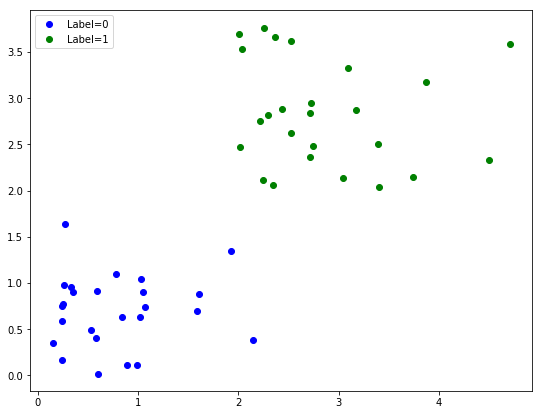

In [4]:
# Plot out labelled data
fig = plt.figure(figsize=[9, 7])
plt.plot(dat[0:n_dat_1, 0], dat[0:n_dat_1, 1], 'b.', ms=12, label="Label=0")
plt.plot(dat[n_dat_2:, 0], dat[n_dat_2:, 1], 'g.', ms=12, label="Label=1")
plt.legend();

### Scikit-Learn Objects

As we can see above, we have two fairly distinct groups of data. Now we want to learn a mathematical procedure that can label these data into two groups, and we want it to learn a general procedure, that we can apply to new datapoints.

Here we will use the typical scikit-learn approach:
- Initialize an sklearn object for the model object we are using, setting the desired parameters
- Train the model on our labelled training data
- Check our performance on our labelled data (typically both the train set, and a separate, labelled, test set)
- Apply the model to make predictions about new datapoints

In [5]:
# Initialize an SVM classifer object
classifier = SVC(kernel='linear')

In [6]:
# Fit our classification model to our training data
classifier.fit(dat, labels)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [7]:
# Calculate predictions of the model on the training data
train_predictions = classifier.predict(dat)

In [8]:
# Print out the performance metrics on the 
print(classification_report(train_predictions, labels))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        25
          1       1.00      1.00      1.00        25

avg / total       1.00      1.00      1.00        50



### Predicting New Data Points

Once we have a trained model, we can predict labels for new data points - data for which we do not know the answer.

In [9]:
# Set a new point - to predict a label for
new_point = np.array([[3, 3]])

In [10]:
# Add our new point to figure (in red)
fig.gca().plot(new_point[0][0], new_point[0][1], '.r', ms=12);

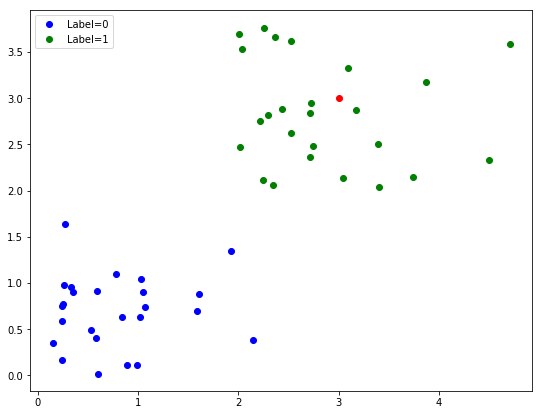

In [11]:
# Redraw figure
fig

In [12]:
# Predict the class of the new data point
prediction = classifier.predict(new_point)
print('Predicted class of new data point is: ', prediction[0])

Predicted class of new data point is:  1


### Support Vectors

One of the key features of SVMs are that they use 'support vectors', meaning they prioritise using information from data points close to the decision boundary, and use them to try to find the widest margin - the distance between the two groups. Here we can briefly explore the support vectors for our trained model.

In [13]:
# Add the support vectors to plot
#  Support vectors will be indicated by being highlighted with black circles
for row in classifier.support_vectors_:
    fig.gca().plot(row[0], row[1], 'ok', ms=14,  mfc='none')

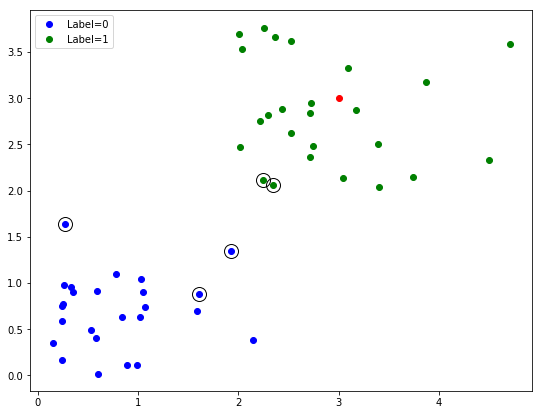

In [14]:
# Redraw the figure
fig

### Drawing the decision boundary

Let's now draw the decision boundary - the boundary at which our learned model thinks the labels switch between groups.

<div class="alert alert-info">
This following code to find and visualize the decision boundary and margins is adapted from this 
<a href="http://scikit-learn.org/stable/auto_examples/svm/plot_separating_hyperplane.html#sphx-glr-auto-examples-svm-plot-separating-hyperplane-py" class="alert-link">sklearn example</a>.
</div>

In [15]:
# Grab the current plot, and find axis sizes
ax = fig.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Create a grid of data to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = classifier.decision_function(xy).reshape(XX.shape)

# Plot the decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--']);

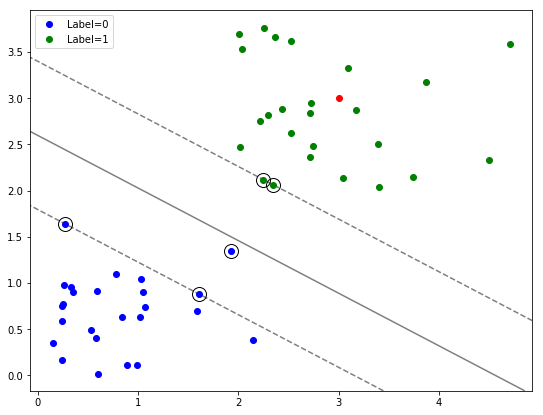

In [16]:
# Redraw figure
fig

### Explorations

With the code above, your are encouraged to explore SVMs. 

Investigate what happens as you change the data, change the kernel, and predict different data points. 